**Exploratory Data Analysis of Bank Customer Churn**

We have client ‘ABC Bank’. Bank has noticed increased number of customers leaving to the bank. To tackle this alarming situation. Bank has decided to collect the data of the past 6 months. 10000 customers are selected randomly among three countries - France, Germany , Spain. The bank wanted to understand get the insights about customer churning so bank can upgrade or adapt new policies.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv("Data/Churn_Data.csv")
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The dataset have the columns RowNumber, CustomerId and Surname will not have any impact on the customer leaving the bank. Out of the remaining variables, Geography, Gender, NumOfProducts, HasCrCard and IsActiveMember are categorical variables and the remaining variables i.e. CreditScore, Age, Tenure, Balance and EstimantedSalary are numerical variables. 


In [4]:
countries = train.Geography.unique()

In [5]:
totalExited = len(train.loc[train.Exited == 1])

In [6]:
def findCountryWiseChurnRatio(countryName,df):
    
    totalPeople= len(df.loc[df.Geography == countryName])
    totalExitedPerCountry = len(df.loc[(df.Exited == 1) & (df.Geography == countryName)])
    return((totalExitedPerCountry/totalPeople)*100)

In [7]:
churnPercentageByCountry =  {x:np.round(findCountryWiseChurnRatio(x,train)) for x in countries}

In [8]:
churnPercentageByCountry

{'France': 16.0, 'Spain': 17.0, 'Germany': 32.0}

In [9]:
sns.set_style("whitegrid")

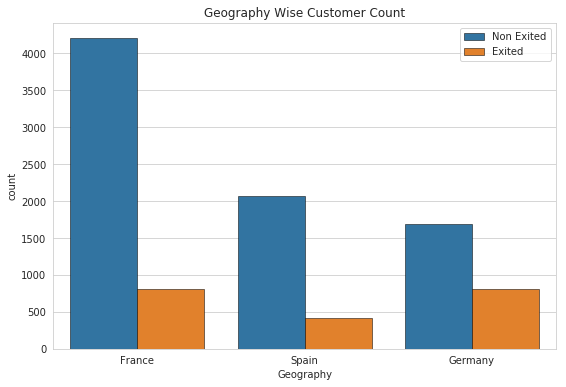

In [10]:
plt.figure(figsize=(9, 6))
ax=sns.countplot(data=train,
                 x = 'Geography',
                 hue = 'Exited',
                 edgecolor=(0,0,0),
                 linewidth=0.5)
plt.title('Geography Wise Customer Count')
plt.legend(['Non Exited','Exited'])

Above Countplot shows the count of customers present in each country and customer churned from the same country. 
Here we can notice France and Germany has maximum number of customers as compared to Spain. But the maximum number of customers are churned from Germany.


Text(0.5, 1.0, 'Age Wise Balance Distribution')

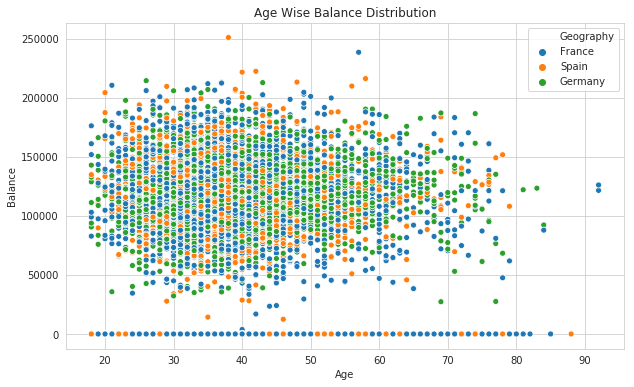

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Age", y="Balance",hue = 'Geography',data=train,)
plt.title('Age Wise Balance Distribution')

Here we are plotting scatter plot which shows “Balance of customer” according to “Age of customer”. But after plotting here we can understand their isn't any correlation between Balance and Age in  customer because points are scattered all over the graph. 
We can observe here one interesting fact that France and Germany has Accounts with 0 balance amount. This is really ironic because Germany has maximum number if churned customers. So this observation invalidate the hypothesis that customers with 0 account balance are most likely to leave the bank. 


In [12]:
def distribution(category):
    NonExited=train[train.Exited == 0][category]
    Exited=train[train.Exited == 1][category]
    plt.figure(figsize=(10,6))
    sns.set()
    plt.hist(NonExited,alpha=0.75,bins = 100,label = 'Not Exited',color = "blue",weights=np.ones(len(NonExited)) / len(NonExited))
    plt.hist(Exited,alpha=0.70,bins = 100,label = 'Exited',color = "red",weights=np.ones(len(Exited)) / len(Exited))
    plt.xlabel(category)
    plt.ylabel('Density')
    plt.legend(loc='upper right')
    plt.title('{} Distribution'.format(category))
    plt.show()

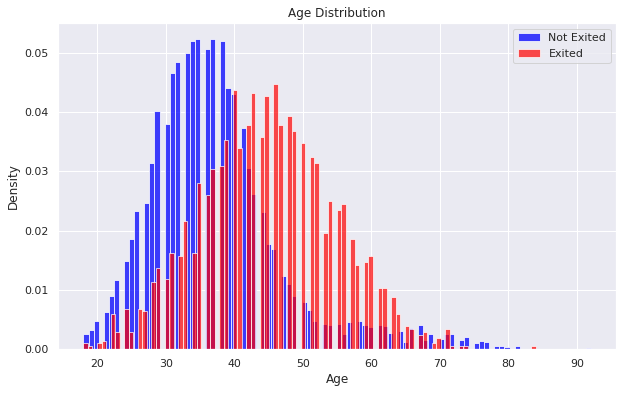

In [13]:
distribution('Age')

The above histogram shows the age distribution according to the customer who stayed and left the bank. Here we observe 2 trends-  
- The number of customers in the bank decrease as the age increases. 
- After the age of 40 there is an increase in the rate of customers leaving the bank. The reason for this may be that other competitor banks offer better incentives.


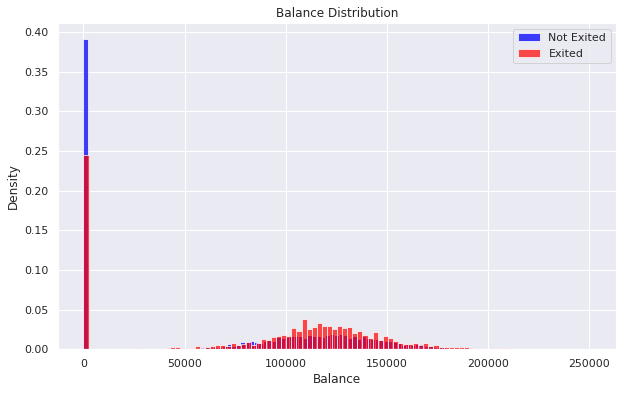

In [14]:
distribution('Balance')

In the plot above we can see that the distribution of balance for the customers who left is normal. 
Also, for the customers with 0 bank balance there is a hike in density- 24% for the customers who left and 39% for the customers who stayed.


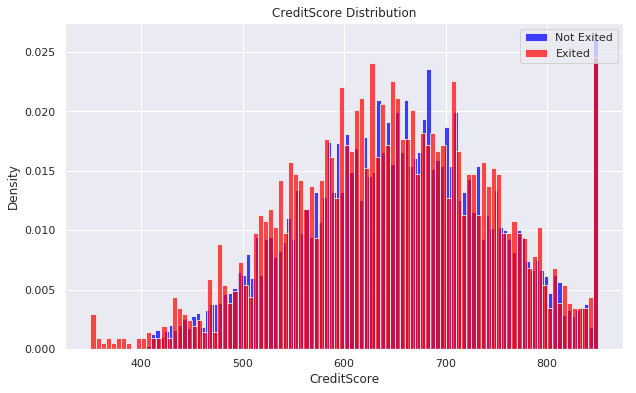

In [15]:
distribution('CreditScore')

We wanted to check is any relation between CreditScore and customer stayed or leaving the bank. In order to that we plot CreditScore distribution using same function distribution(‘CreditScore’). 
Here we see that there isn’t any pattern in the customers who left, but there is a pattern in the customers who have a Credit Score less than 400 and it’s observed that they are leaving..


In [16]:
x1 = list(train[train.Geography == 'France']['Balance'])
x2 = list(train[train.Geography == 'Germany']['Balance'])
x3 = list(train[train.Geography == 'Spain']['Balance'])

Text(0.5, 1.0, 'Balance distribution with country')

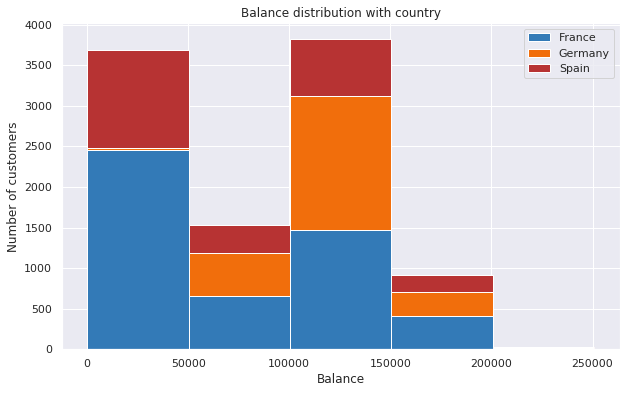

In [17]:
sns.set()
plt.figure(figsize=(10,6))
plt.hist([x1,x2,x3],bins = 5,stacked=True,color = ['#337ab7','#f16e0c','#b73333'],)
plt.xlabel('Balance')
plt.ylabel('Number of customers')
plt.legend(['France','Germany','Spain'])
plt.title('Balance distribution with country')

The plot above shows the Balance of customers of different countries. 

In the first bar you notice, It contains the customers who have a balance between (0 - 50000). France has the highest number of customers and then comes Spain and Germany has very less customers in this segment. 

In the third bar, you notice Germany (100000 - 150000) has the maximum number of customers. 

Based on the above plot we can conclude that the accounts from Germany are very rich as compared to the other two countries. But if you see Plot 1 then you’ll understand the maximum number of customers leaving the bank are from Germany.


**On this note, we can infer that Germany has multiple banks which offer better incentives to the customers as compared to the ABC Bank. That's why a number of customers are moving out and opting for other banks. We don't have data of other banks so it’s better we speculate.**



Text(0.5, 1.0, 'Estimated Salary with Age')

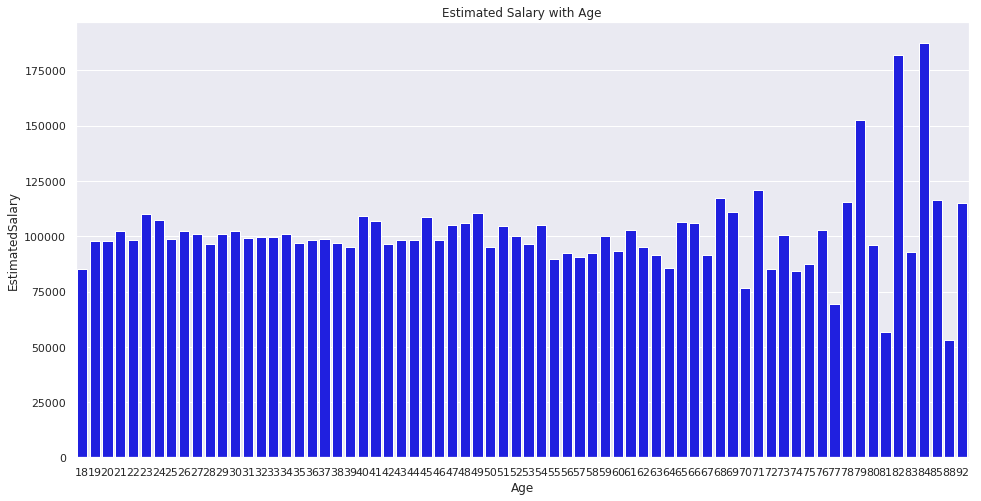

In [18]:
plt.figure(figsize=(16,8))
sns.barplot(x= 'Age',y = 'EstimatedSalary',data = train,color='blue',ci=None)
plt.title('Estimated Salary with Age')

Generally, it is observed that as age increases, a person’s salary increases. 

To check this assumption we have plotted the estimated salary with age. If we see the plot then we can observe that our assumption is wrong.

A weird pattern that we see is that after the age of 81 there is a rise in salary which goes above 175000. That may be because customers are generating income from their late blooming sources like businesses and investments.
